# [# Analytics Model API](https://www.analytics-model.com)

Transform your data into expert insights in seconds with Analytics Model. Our AI-powered platform empowers your management team to make confident, data-driven strategic decisions by delivering personalized insights and stunning visualizations through natural language queries.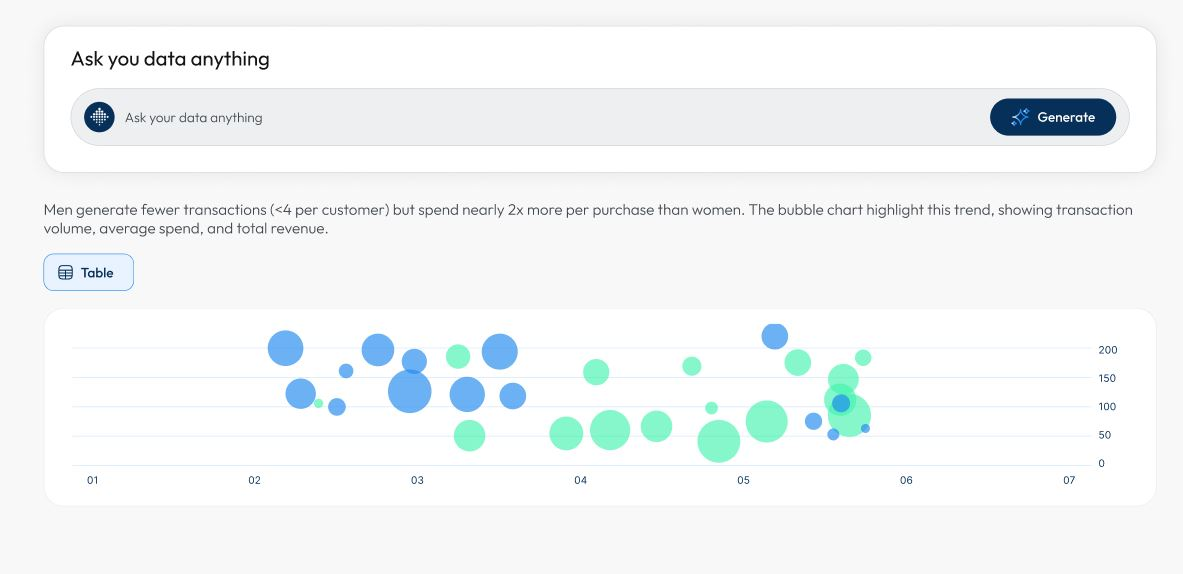 Whether you're analyzing big data from multiple sources or looking for real-time, actionable business insights, Analytics Model simplifies complex data analysis, making it accessible for all users, regardless of their technical background.

Visit us at www.analytics-model.com for more information or reach out to us at Support@analytics-model.com.

# User Authentication API
This API handles user authentication through three simple steps: user registration, email verification, and token-based login. Once authenticated, users receive a token to securely access the system

**Create a User:**
First, sign up by providing your details through the API. This step registers your account.

**Verify Your Email:**
After signing up, you'll receive an email with a verification link. Click the link to confirm your email address—this ensures security and prevents unauthorized access.

**Get Your Token:**
Once your email is verified, you can log in using the API. After successful authentication, you'll receive a token.

***Please note***: The token expires after 1-2 hours. Once expired, you can make another request to obtain a new valid token

Now you can use the token to make API requests:
The token is like a digital key that allows you to securely interact with the API. Use it in your requests to access protected resources and perform actions.

In [ ]:
# Create a User: First, sign up by providing your details through the API.
# To begin, you’ll need to register your account by providing the following details:

# email: Your email address (e.g., "your-email@example.com")
# password: Your desired password (e.g., "your-password")
# firstname: Your first name (e.g., "John")
# lastname: Your last name (e.g., "Doe")


email= "your-email@example.com"
password= "your-password"
firstname= "John"
lastname= "Doe"



############################
############################
############################

userDetails = {
    "email": email,
    "password": password,
    "firstname": firstname,
    "lastname": lastname
}





import requests

url = "https://2m2rc19wr6.execute-api.eu-north-1.amazonaws.com/dev/api/user/register"
headers = {
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7",
    "content-type": "application/json",
    "origin": "https://personalycs.com",
    "priority": "u=1, i",
    "referer": "https://personalycs.com/",

}

data = userDetails

response = requests.post(url, headers=headers, json=data)
print(response.status_code)
display(response.json())


400


{'message': 'Email already exists.'}

In [ ]:
# Ensure that you've completed the verification process by clicking the link sent to your email. After verification, you can log in using the API.
#  Upon successful authentication, you will receive a token. This token will be required for making API requests.




import requests

# Login User
login_data = {
    "email": email,
    "password": password
}


login_url = "https://2m2rc19wr6.execute-api.eu-north-1.amazonaws.com/dev/api/user/login"

headers = {
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7",
    "content-type": "application/json",
    "origin": "https://personalycs.com",
    "priority": "u=1, i",
    "referer": "https://personalycs.com/"
}



login_response = requests.post(login_url, headers=headers, json=login_data)

Token = "Bearer " + login_response.json().get("access_token")


# Token



# Connector API

The Connector API allows users to integrate with 500+ data sources, enabling seamless querying and analysis of their own data.

**Get Available Data Sources:**
Use the `get_data_source` request to retrieve a list of supported data sources, such as MySQL, Snowflake, PostgreSQL, Shopify, and more.

**Check Data Source Parameters:**
Once you’ve chosen a data source, use the `get_data_source_params `request to find out which parameters are required.
For example, to connect to a MySQL database, you'll need details like server URL, username, and password.

After providing the necessary details, establish a secure connection to your data source, and start querying and analyzing your data to gain valuable insights.

**Get Your Connections:**
Use the `api/connectors` request to retrieve a list of all data sources you have successfully connected to. This helps you manage and review your integrations easily.

**Delete a Connection:**
If you no longer need a connection, use the `delete_connection` request to remove it. This ensures your list of connections stays clean and secure.

**Public Demo Connection**
For testing purposes, you can use the public connection ID:
`66d80634aaa4b47cbb1fd3cd`
This connection contains demo data and is accessible to all users, allowing you to experiment with API functionality before connecting your own data sources.


In [ ]:
# Analytics Model supports over 500+ data sources. To retrieve a list of all available data sources, use the get_data_source request.
# This will return a list of supported data sources such as MySQL, Snowflake, PostgreSQL, Shopify, and more.




import pandas as pd
import requests


def get_sources():
    url = "https://insights.personalycs.com/api/airbyte/sources"
    headers = {
        "accept": "application/json",
        "authorization":Token
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        response_data = response.json()
        sources = response_data.get("data", {}).get("sources", [])
        return sources
    else:
        print("Error:", response.status_code, response.text)
        return []

# Fetch the sources
sources = get_sources()

# Convert to DataFrame and display
df = pd.DataFrame(sources)
display(df[df["name"].str.contains("source-", case=False, na=False)])

,name,type
57,source-7shifts,source
58,source-activecampaign,source
59,source-adjust,source
60,source-agilecrm,source
61,source-aha,source
...,...,...
567,source-zoho-expense,source
568,source-zoho-inventory,source
569,source-zoho-invoice,source
570,source-zonka-feedback,source


In [ ]:
# To connect to a data source, specify the one you wish to use in your project. For example:

Data_source = "bigquery"



############################
############################
############################



Data_source_name = df[df["name"].str.contains(Data_source, case=False, na=False) & df["name"].str.contains("source-", case=False, na=False)]['name'].iloc[0]

display(Data_source_name )

'source-bigquery'

In [ ]:
# Check Data Source Parameters: Once you’ve chosen a data source, use the get_data_source_paramsrequest to find out which parameters are required. For example, to connect to a MySQL database, you'll need details like server URL, username, and password.
# After providing the necessary details, establish a secure connection to your data source, and start querying and analyzing your data to gain valuable insights.

import requests

def get_source_fields():
    url = f"https://insights.personalycs.com/api/airbyte/sources/{Data_source_name}/fields"
    headers = {
        "accept": "application/json",
        "authorization":Token
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code, response.text)
        return None

# Fetch Shopify source fields
source_fields = get_source_fields()

# Print the response
display("Source Fields:", source_fields)


'Source Fields:'

{'is_success': True,
 'status_code': 200,
 'data': {'success': True,
  'fields': {'success': True,
   'source': 'source-bigquery',
   'title': 'BigQuery Source Spec',
   'required_fields': {'project_id': {'type': 'string',
     'title': 'Project ID',
     'description': 'The GCP project ID for the project containing the target BigQuery dataset.',
     'examples': [],
     'default': None,
     'airbyte_secret': False,
     'order': None},
    'credentials_json': {'type': 'string',
     'title': 'Credentials JSON',
     'description': 'The contents of your Service Account Key JSON file. See the <a href="https://docs.airbyte.com/integrations/sources/bigquery#setup-the-bigquery-source-in-airbyte">docs</a> for more information on how to obtain this key.',
     'examples': [],
     'default': None,
     'airbyte_secret': True,
     'order': None}},
   'raw_config_spec': {'$schema': 'http://json-schema.org/draft-07/schema#',
    'title': 'BigQuery Source Spec',
    'type': 'object',
    'req

In [ ]:
# Below is the JSON that outlines the required fields for selecting a data source. In the previous step, you saw which parameters to set. Here, you’ll find only the fields necessary for your chosen source selection.


import pandas as pd

required_fields = source_fields['data']['fields']['required_fields']
# Generate the credentialJson using the title and default values from required_fields

display(required_fields)





{'project_id': {'type': 'string',
  'title': 'Project ID',
  'description': 'The GCP project ID for the project containing the target BigQuery dataset.',
  'examples': [],
  'default': None,
  'airbyte_secret': False,
  'order': None},
 'credentials_json': {'type': 'string',
  'title': 'Credentials JSON',
  'description': 'The contents of your Service Account Key JSON file. See the <a href="https://docs.airbyte.com/integrations/sources/bigquery#setup-the-bigquery-source-in-airbyte">docs</a> for more information on how to obtain this key.',
  'examples': [],
  'default': None,
  'airbyte_secret': True,
  'order': None}}

In [ ]:
# Based on the previous JSON instructions, you need to modify the credentialJson to include the necessary fields and parameters for your selected data source.
# This cell is used only to verify the source details and retrieve all the tables within the source.
#  Here’s an example for connecting to BigQuery:


# {
#   "credentialJson": {
#     "project_id": "your_project_id",
#     "dataset_id": "your_dataset_id",
#     "credentials_json": "your_credentials_json"
#   }
# }

# Make sure to replace the placeholder values with the actual credentials for your data source.


project_id=  "your_project_id",
dataset_id = "your_dataset_id",
credentials_json =  "json.dumps({\"type\": \"service_account\", \"project_id\": \"your_project_id\", \"private_key_id\": \"your_private_key_id\", \"private_key\": \"your_private_key\", \"client_email\": \"your_client_email\", \"client_id\": \"your_client_id\", \"auth_uri\": \"https://accounts.google.com/o/oauth2/auth\", \"token_uri\": \"https://oauth2.googleapis.com/token\", \"auth_provider_x509_cert_url\": \"https://www.googleapis.com/oauth2/v1/certs\", \"client_x509_cert_url\": \"your_client_x509_cert_url\", \"universe_domain\": \"googleapis.com\" })"

data = {
    "connectionSource": Data_source_name,
    "credentialJson": {
    "project_id": project_id,
    "dataset_id": dataset_id,
    "credentials_json": credentials_json
    }
    }



############################
############################
############################


import requests

url = "https://insights.personalycs.com/api/connectors/verify"

headers = {
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7",
    "authorization": Token,
    "content-type": "application/json",
    "origin": "https://personalycs.com",
    "priority": "u=1, i",
    "referer": "https://personalycs.com/",

}




response = requests.post(url, headers=headers, json=data)

print(response.status_code)

# Extract tables
tables = response.json().get('data', {}).get('tables', [])

display(tables)

201


['Contacts',
 'insights_feed',
 'insights_feed_ecommerce',
 'insights_feed_ecommerce_google_sheet',
 'insights_feed_google_sheet',
 'ituran_synt']

In [ ]:
# In this step, set the connection name and choose the table you want to connect to from the list provided above.
# Once you run it, you’ll receive the connection ID, which will allow you to query and maintain the connection for future use.



Connection_name = "bigquery test"
table = tables[0]
driver = "BIGQUERY"
############################
############################
############################

import requests

url = 'https://insights.personalycs.com/api/connectors'

headers = {
    'sec-ch-ua-platform': '"Windows"',
    'Authorization': Token,
    'Referer': 'https://personalycs.com/',
    'sec-ch-ua': '"Chromium";v="134", "Not:A-Brand";v="24", "Google Chrome";v="134"',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Content-Type': 'application/json'
}

data = {
    "connectionName": Connection_name,
    "isOdbc": False,
    "isAirbyte": True,
    "tableId": table ,
    "driver": driver,
    "connectionSource": Data_source_name,
    "credentialJson": {
        "project_id": project_id,
        "dataset_id": dataset_id,
        "credentials_json": credentials_json
}}

# Make the POST request
response = requests.post(url, headers=headers, json=data)

# Handle the response
if response.status_code == 201:
    print("Request was successful!")
    # print(response.json())  # Printing the response content
# else:
    # print(f"Request failed with status code {response.status_code}")
    # print(response.text)


Request was successful!


In [ ]:
# Get Your Connections: Use the this request to retrieve a list of all data sources you have successfully connected to. This helps you manage and review your integrations easily.



table_id = "66d80634aaa4b47cbb1fd3cd"  # Damo table, replace with your desired table ID

############################
############################
############################

import pandas as pd
import requests
from IPython.display import display




# Define the API endpoint
url = "https://insights.personalycs.com/api/connectors"

# Define headers
headers = {
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7",
    "authorization":Token,
    "if-none-match": 'W/"6900-vvPFTwX6RJpm8Q2H/uLXod0nCGI"',
    "origin": "https://personalycs.com",
    "priority": "u=1, i",
    "referer": "https://personalycs.com/"
}

try:
    # Send the GET request
    response = requests.get(url, headers=headers)

    # Check for a successful response
    response.raise_for_status()

    # Parse JSON response
    response_data = response.json()

    # Extract the 'data' field
    data = response_data['data']

    # Convert to DataFrame
    df = pd.json_normalize(data)

    # Display the first few rows of the DataFrame
    print("Data sources retrieved successfully:")
    # print(df)

    display(df.iloc[:, :9])

except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")


Data sources retrieved successfully:


,_id,connectionSource,connectionName,projectId,datasetId,tableId,is_active,status,createdBy
0,66d80634aaa4b47cbb1fd3cd,DEMO,DEMO,personalycs,public_data,Sales_demo,True,ACTIVE,19
1,675a67899793a2a2741493e3,REDSHIFT,Demo red,dev,dev,demo,True,ACTIVE,125
2,675bb61a9793a2a274149403,REDSHIFT,reshift123,dev,dev,demo,True,ACTIVE,125
3,675bb6439793a2a274149405,REDSHIFT,reshift123 red,dev,dev,demo,True,ACTIVE,125
4,67726433b30b59de700901b1,source-redshift,airbyte-redshift,dev,dev,demo,True,ACTIVE,125
5,678946ec8c72b6ea3951ce0a,source-mongodb-v2,Airbyte,,,Demo,True,ACTIVE,125
6,678947308c72b6ea3951ce0c,source-mongodb-v2,Airbyte,,,Demo,True,ACTIVE,125
7,678947888c72b6ea3951ce0e,source-mongodb-v2,Airbyte,,,Demo,True,ACTIVE,125
8,678947b48c72b6ea3951ce10,source-mongodb-v2,Airbyte,,,Demo,True,ACTIVE,125
9,678949788c72b6ea3951ce12,source-mongodb-v2,Airbyte,,,Demo,True,ACTIVE,125


In [ ]:
# This API allows users to remove a specific table from their connected data source. Once removed, the table will no longer be accessible for querying or analysis within the platform.

Delete_table = "675fcd2881a098bcc1d9dd6b"


############################
############################
############################


import requests

# Define the URL
url = f"https://insights.personalycs.com/api/connectors/{Delete_table}"

# Define the headers
headers = {
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7",
    "authorization": Token,
    "origin": "https://personalycs.com",
    "priority": "u=1, i",
    "referer": "https://personalycs.com/"
}

# Send the DELETE request
response = requests.delete(url, headers=headers)

# Print response
print("Status Code:", response.status_code)
print("Response:", response.text)


Status Code: 403
Response: {"is_success":false,"path":"/api/connectors/675fcd2881a098bcc1d9dd6b","status_code":403,"error":"Forbidden","message":"Forbidden resource"}


# Tables API
This API allows users to retrieve the structure and rows of a table for a specific connection.

# Query API

The Query API allows users to interact with their data, execute queries, and generate insights efficiently. All query results are cached for 1 hour to optimize performance.

What You Can Do with the Query API:

**Query Your Data:** Run queries to retrieve and explore your data.
See examples of the first 5 rows data in your connected sources. `api/tables/{table_id}/rows`

**Receive question suggestions:** based on your data.
Get recommended queries to help you uncover useful insights.
Generate Insights with Prompts. `query/{table_id}/suggestions`

**Write a question or prompt:** to generate charts and text-based insights.
The API processes your request and returns visual and analytical responses.


In [ ]:
# **Query Your Data:** Run queries to retrieve and explore your data.
# See examples of the first 5 rows data in your connected sources.


table_id = "66d80634aaa4b47cbb1fd3cd"  # Damo table, replace with your desired table ID


import requests
import pandas as pd



# API URL
url = f"https://insights.personalycs.com/api/tables/{table_id}/rows"


# Headers (removed If-None-Match)
headers = {
    "Accept": "application/json, text/plain, */*",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7",
    "Authorization": Token,
    "Origin": "https://personalycs.com",
    "Referer": "https://personalycs.com/",

}


# Send GET request
response = requests.get(url, headers=headers)

# Check if the response is successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Extract rows data
    rows = data.get('data', [])

    # Check if rows is not empty and flatten the nested 'Purchase_DATE' field
    if rows:
        for row in rows:
            # Flatten 'Purchase_DATE' field, extracting the value
            if isinstance(row.get('Purchase_DATE'), dict):
                row['Purchase_DATE'] = row['Purchase_DATE'].get('value')

        # Convert to DataFrame
        df = pd.DataFrame(rows)
        display(df)
    else:
        print("No rows found in the data.")
else:
    print(f"Error {response.status_code}:", response.text)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Profit,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,506151,40,Female,2,1,2024-03-04,2,PayPal,497,Firefox,Subscribed,True
1,511898,55,Female,2,1,2024-07-12,2,PayPal,418,Chrome,Subscribed,False
2,512508,30,Male,2,1,2024-10-01,2,Credit Card,827,Chrome,Subscribed,True
3,514344,37,Female,2,1,2024-02-20,2,Debit Card,426,Chrome,Subscribed,True
4,516349,59,Female,2,1,2024-01-17,2,Credit Card,1029,Firefox,Subscribed,True


In [ ]:
# Receive question suggestions: based on your data. Get recommended queries to help you uncover useful insights. Generate Insights with Prompts

import requests
import pandas as pd

url = f"https://insights.personalycs.com/api/query/{table_id}/suggestions"
headers = {
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7",
    "authorization": Token,
    "if-none-match": "W/\"358-Iom5xBEGgbuI4rqR/YcnmmttKXY\"",
    "origin": "https://personalycs.com",
    "priority": "u=1, i",
    "referer": "https://personalycs.com/"

}
# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the 'data' field from the response
    data = response_data.get('data', [])

    # If data is not empty, convert the list of questions into a DataFrame
    if data:
        df = pd.DataFrame(data, columns=['Question'])
        display(df)
    else:
        print("No data available.")
else:
    print(f"Request failed with status code {response.status_code}: {response.text}")


,Question
0,What is the total revenue generated from all p...
1,How many unique customers have made purchases ...
2,What is the average profit margin for each pur...
3,How many purchases were made using vouchers co...
4,What is the total time spent by customers on t...
5,Which gender has made the highest number of pu...
6,How many customers have subscribed to the news...
7,What is the distribution of purchase dates acr...
8,How does the revenue generated vary based on t...
9,Can we identify any correlation between the br...


In [ ]:
# **Write a question or prompt:** to generate charts and text-based insights.
# The API processes your request and returns visual and analytical responses.


prompt = "show total revenue"
library = "Echarts"



############################
############################
############################





import requests
import matplotlib.pyplot as plt

# API URL
url = f'https://insights.personalycs.com/api/query/{table_id}'

# Headers
headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-GB,en-US;q=0.9,en;q=0.8,he;q=0.7',
    'Authorization':Token,
    'Content-Type': 'application/json',
    'Origin': 'https://personalycs.com',
    'Referer': 'https://personalycs.com/',

}

# JSON Payload
payload = {
    "instructions": prompt,
    "filter": [],
    "chartType": {
        "library": library
    },
    "chartStatus": "private",
    "conversationHistory": []
}


# Send POST request
response = requests.post(url, headers=headers, json=payload)

# Check response status and print the result
    # response.status_code == 200:
data = response.json()  # Parse the JSON response here
# print(data)

    # Extract the desired parts
text_config = data["data"]["textConfig"]
chart_config = data["data"]["chartConfig"]
query = data["data"]["query"]
result = data["data"]["result"]

print("\nText:")
display(text_config)

print("\nChart:")
display(chart_config)

print("\nQuery:")
display(query)

print("\nResult:")
display(result)
# else:
#     print(f"Error {response.status_code}: {response.text}")



Text:


"The total revenue based on the provided data is $1,824,716.20. This figure represents the overall income generated by the business within a specific period of time. Total revenue is a key metric for assessing the financial performance of a company and can be used to analyze sales trends, profitability, and overall growth. By tracking total revenue, businesses can make informed decisions about pricing strategies, marketing efforts, and resource allocation to drive further success and achieve their financial goals. In this case, the total revenue of $1,824,716.20 reflects the company's financial health and performance during the period in question."


Chart:


{'title': {'text': 'Total Revenue'},
 'tooltip': {'trigger': 'axis'},
 'xAxis': {'type': 'category', 'data': ['Total Revenue']},
 'yAxis': {'type': 'value'},
 'series': [{'name': 'Revenue', 'type': 'bar', 'data': [1824716.2000008728]}]}


Query:


'SELECT CAST(SUM(Revenue_Total) AS STRING) AS Total_Revenue\nFROM `personalycs.public_data.Sales_demo`\nLIMIT 10000;'


Result:


[{'Total_Revenue': '1824716.2000008728'}]

In [ ]:
# This code takes the output data and presents it either as text or a chart by extracting the necessary configurations and results. Here’s how it works in simple terms:

from IPython.core.display import display, HTML
import json

# Define your Python chart configuration (example)
chart_config

# Convert Python dictionary to JSON string
chart_config_json = json.dumps(chart_config)

# Create the HTML/JavaScript code with the chart configuration injected
echart_html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ECharts Example</title>
    <!-- Include ECharts library -->
    <script src="https://cdn.jsdelivr.net/npm/echarts@5.3.2/dist/echarts.min.js"></script>
</head>
<body>
  <p>{text_config}</p>
    <!-- Create a div element for rendering the chart -->
    <div id="main" style="width: 600px;height:400px;"></div>

    <script type="text/javascript">
        // Initialize the ECharts instance
        var myChart = echarts.init(document.getElementById('main'));

        // Inject the chart configuration from Python
        var option = {chart_config_json};

        // Use the specified options to display the chart
        myChart.setOption(option);
    </script>
</body>
</html>
"""

# Display the HTML content with the embedded chart
display(HTML(echart_html))


In [ ]:
# This code processes the output data and presents it as a **pivot table**, organizing and summarizing the data dynamically based on the extracted configurations.

from IPython.core.display import display, HTML
import json

# Sample data structure if you don't have data defined
# Replace this with your actual data
data = result

# Default text if not defined elsewhere
text_config = "Data Analysis"

# Create the HTML/JavaScript code with PivotTable implementation and all renderers
pivot_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>PivotTable Example</title>
    <!-- Include PivotTable.js library and dependencies -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.23.0/pivot.min.css">
    <script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.6.0/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.23.0/pivot.min.js"></script>

    <!-- Include D3.js for D3 renderers -->
    <script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.17/d3.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.23.0/d3_renderers.min.js"></script>

    <!-- Include Plotly.js for Plotly renderers -->
    <script src="https://cdnjs.cloudflare.com/ajax/libs/plotly.js/1.58.4/plotly-basic.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.23.0/plotly_renderers.min.js"></script>

    <!-- Include C3.js for C3 renderers (part of d3_renderers) -->
    <script src="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.18/c3.min.js"></script>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.18/c3.min.css">

    <!-- Include export renderers -->
    <script src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.23.0/export_renderers.min.js"></script>
</head>
<body>
    <p>%s</p>
    <!-- Create a div element for the pivot table -->
    <div id="output" style="margin: 30px;"></div>

    <script type="text/javascript">
        // Error handling wrapper
        try {
            // Get data from Python
            var pivotData = %s;

            // Check if data is properly structured
            if (!Array.isArray(pivotData) || pivotData.length === 0) {
                document.getElementById('output').innerHTML = '<p style="color: red;">Error: Invalid data structure for pivot table. Data must be a non-empty array of objects.</p>';
                throw new Error('Invalid data structure');
            }

            // Initialize the PivotTable with basic error handling
            $(function() {
                try {
                    // Combine all renderers
                    var renderers = $.extend(
                        $.pivotUtilities.renderers,
                        $.pivotUtilities.plotly_renderers,
                        $.pivotUtilities.d3_renderers,
                        $.pivotUtilities.export_renderers
                    );

                    $("#output").pivotUI(
                        pivotData,
                        {
                            // Default to first string column for rows and first numeric column for values
                            rows: [Object.keys(pivotData[0]).find(k => typeof pivotData[0][k] === 'string')],
                            // Use aggregator on first numeric field found
                            vals: [Object.keys(pivotData[0]).find(k => typeof pivotData[0][k] === 'number')],
                            aggregatorName: "Sum",
                            rendererName: "Table",
                            renderers: renderers
                        },
                        true // Enables the UI to be shown
                    );
                } catch (e) {
                    document.getElementById('output').innerHTML = '<p style="color: red;">Error initializing PivotTable: ' + e.message + '</p>';
                    console.error('PivotTable initialization error:', e);
                }
            });
        } catch (e) {
            document.getElementById('output').innerHTML = '<p style="color: red;">Error setting up PivotTable: ' + e.message + '</p>';
            console.error('Setup error:', e);
        }
    </script>
</body>
</html>
""" % (text_config, json.dumps(data))

# Display the HTML content with the embedded pivot table
display(HTML(pivot_html))

# Users API
Fetch user parameters from the API.